# **INFO5731 Assignment 5**

---


**This exercise aims to provide a comprehensive learning experience in text analysis and machine learning techniques, focusing on both text classification and clustering tasks.**

***Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks***.

**Expectations**:
*   Students are expected to complete the exercise during lecture period to meet the active participation criteria of the course.
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).

**Total points**: 100

**Full Points will be given those who present well**

**Late submissions will have a penalty of 10% of the marks for each day of late submission, and no requests will be answered. Manage your time accordingly.**


# **Question 1 (20 Points)**

# **SENTIMENT ANALYSIS**

The objective of this assignment is to give you **hands-on experience** in applying various** sentiment analysis techniques** on real-world textual data. You are expected to explore data, apply machine learning models, and evaluate their performance

**1. Dataset Collection & Preparation**

Find a real-world dataset with text and positive, negative, and neutral sentiment labels.

Justify your dataset choice and handle **class imbalance** if needed.

**2. Exploratory Data Analysis (EDA)**

Clean and preprocess the data (tokenization, stopwords, lemmatization).

Perform EDA: class distribution, word clouds, n-gram analysis, sentence lengths, etc.

Visualize insights using relevant plots and charts.

**3. Sentiment Classification**

Apply at least three traditional ML models (e.g., SVM, Naive Bayes, XGBoost) using TF-IDF or embeddings.

If applicable, compare with a pretrained model (RoBERTa/BERT).

Tune hyperparameters and use cross-validation.

**4. Evaluation & Reporting**

Evaluate with metrics: Accuracy, Precision, Recall, F1, Confusion Matrix.

Summarize results, compare models, and reflect on what worked.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
data = pd.read_csv('amazon_reviews_cleaned.csv')
print(data.head())
#

                                              Review  word_count  char_count  \
0  This case along with tempered glass screen and...          84         489   
1  I’ve tried other cases for my iPhones and they...         206        1096   
2  Love it. Fits perfectly and is somewhat light ...          32         190   
3  I think it's safe to say apple knows it's prod...         210        1089   
4  Love this case!! The design is sleek and makes...          53         269   

   avg_word  stopwords  hastags  numerics  upper  \
0  4.833333         27        0         1      0   
1  4.325243         94        0         0      4   
2  4.968750         11        0         0      0   
3  4.190476        100        0         2      4   
4  4.094340         24        0         0      0   

                                      Cleaned_Review  
0  this along tempered glass screen lens protecto...  
1  ive tried iphones either stiff color fade time...  
2  love perfectly somewhat light weight p

In [ ]:
!pip install transformers==4.31.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.9/116.9 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 93.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 109.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.21.1
    Uninstalling tokenizers-0.21.1:
      Successfully uninstalled tokenizers-0.21.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.51.3
    Uninstalling transformers-4.51.3:
      Successfully uninstalled transformers-4.51.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.31.0 which is incompatible.


In [ ]:
from transformers import pipeline

In [ ]:
#sentiment Analysis positive, Negative, Neutral for Cleaned_Review
classifier = pipeline("sentiment-analysis")
data['sentiment'] = data['Cleaned_Review'].apply(lambda x: classifier(x)[0]['label'])

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommend

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
Xformers is not installed correctly. If you want to use memory_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [ ]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = nltk.word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalnum() and token not in stop_words]
    return ' '.join(tokens)

data['processed_Sentiment'] = data['sentiment'].apply(preprocess_text)

In [ ]:
print(data['sentiment'].describe())

count          808
unique           2
top       POSITIVE
freq           606
Name: sentiment, dtype: object


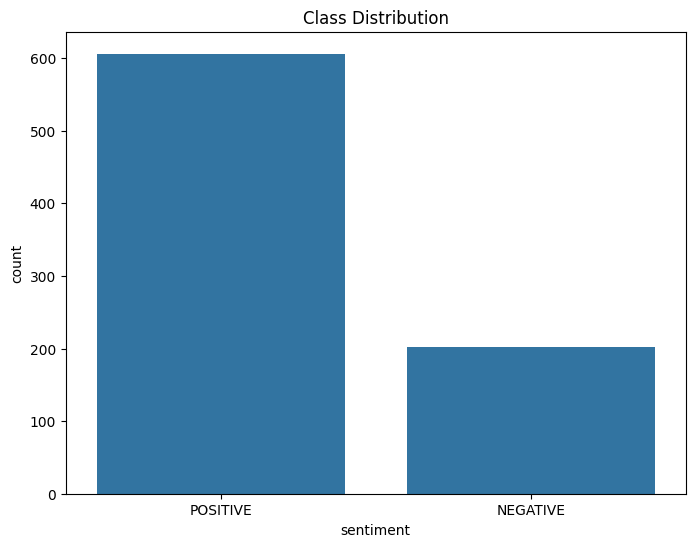

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=data)
plt.title('Class Distribution')
plt.show()

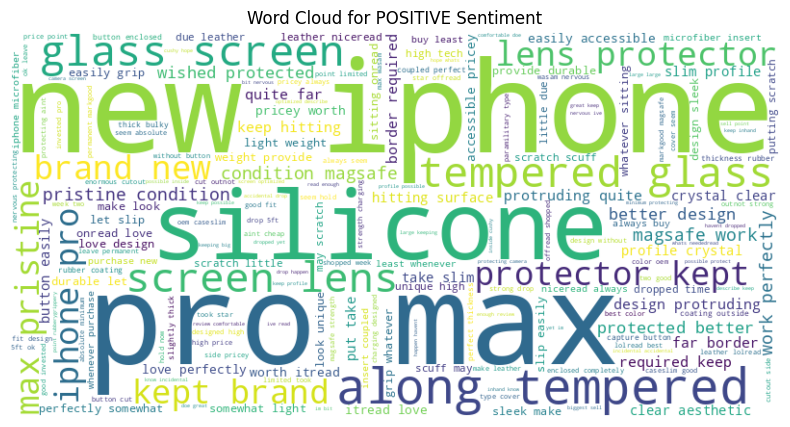

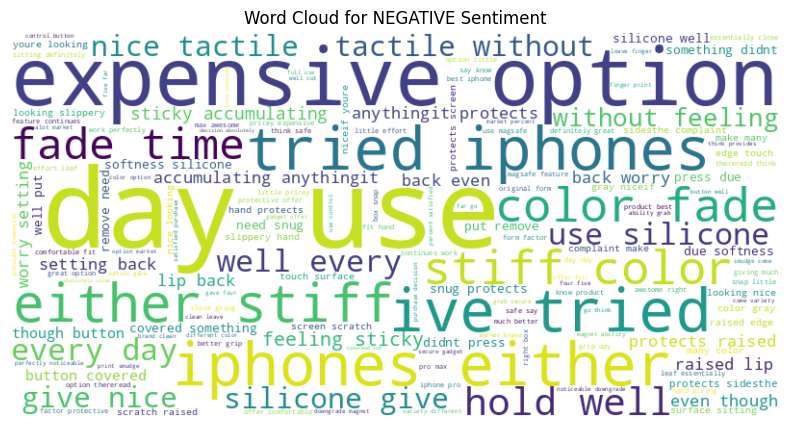

In [ ]:
for sentiment in data['sentiment'].unique():
    text = ' '.join(data[data['sentiment'] == sentiment]['Cleaned_Review'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment} Sentiment')
    plt.axis('off')
    plt.show()

In [ ]:
vectorizer = CountVectorizer(ngram_range=(2, 2))  # Example: Bigrams
X = vectorizer.fit_transform(data['processed_text'])
bigram_counts = pd.DataFrame({'bigram': vectorizer.get_feature_names_out(), 'count': np.array(X.sum(axis=0))[0]})
print(bigram_counts.sort_values(by='count', ascending=False).head(10)) # Display Top 10 bigrams

                                  bigram  count
21                                ai art     23
70               aiartcommuity aiartists     23
71                aiartists generativeai     23
134                     art alkaidvision     23
99            alkaidvision aiartcommuity     23
44                       ai generativeai     14
147  artificialintelligence generativeai     12
450                    generativeai data     12
332            digitaltransformation mwc     12
291                   data cybersecurity     12


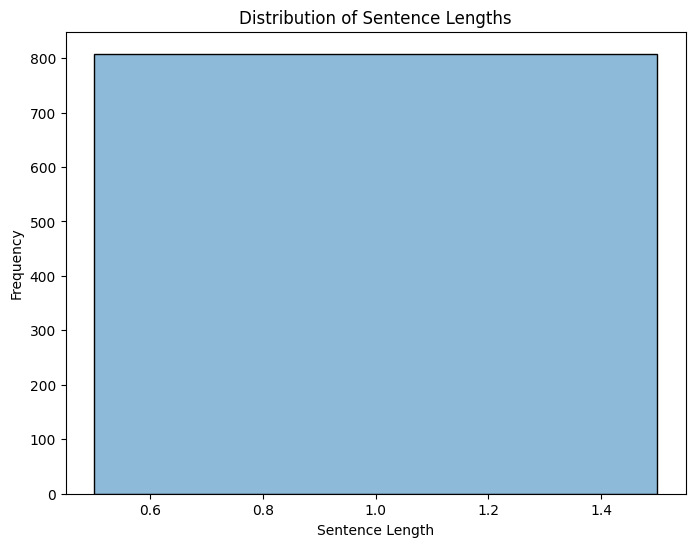

In [ ]:
data['sentence_length'] = data['Cleaned_Review'].apply(lambda x: len(nltk.sent_tokenize(x)))
plt.figure(figsize=(8,6))
sns.histplot(data['sentence_length'], kde=True)
plt.title('Distribution of Sentence Lengths')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [ ]:
X = data['processed_Sentiment']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

Training SVM...
SVM Accuracy: 1.0
              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00        43
    POSITIVE       1.00      1.00      1.00       119

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



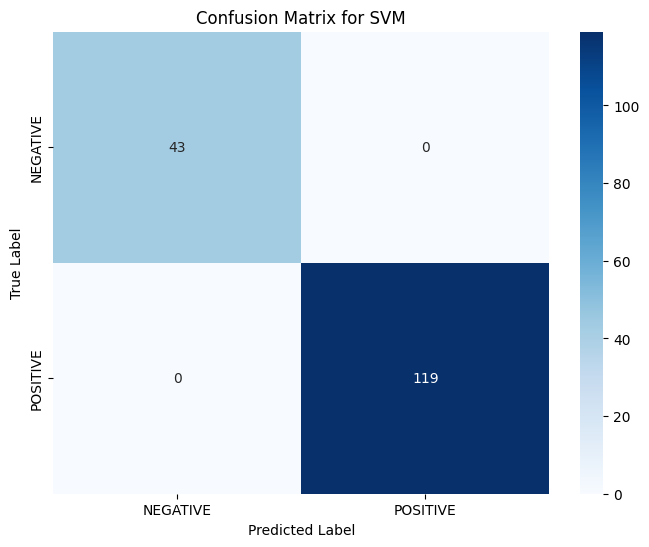

SVM Cross-Validation Scores: [1. 1. 1. 1. 1.]
SVM Mean Cross-Validation Score: 1.0
Training Naive Bayes...
Naive Bayes Accuracy: 1.0
              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00        43
    POSITIVE       1.00      1.00      1.00       119

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



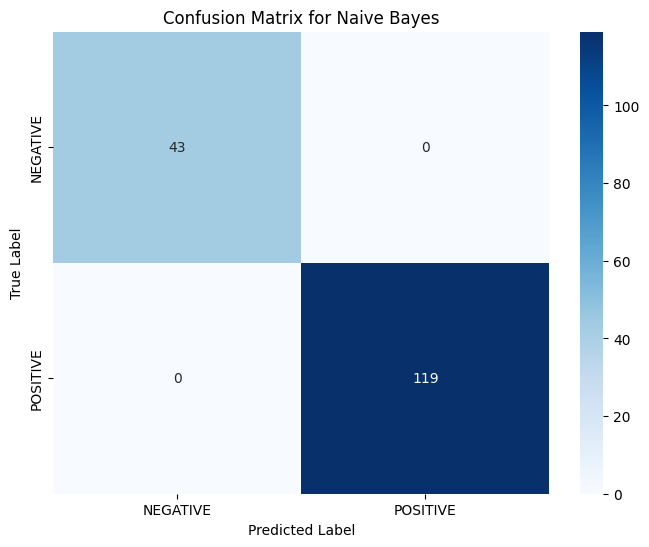

Naive Bayes Cross-Validation Scores: [1. 1. 1. 1. 1.]
Naive Bayes Mean Cross-Validation Score: 1.0
Training XGBoost...
XGBoost Accuracy: 1.0
              precision    recall  f1-score   support

    NEGATIVE       1.00      1.00      1.00        43
    POSITIVE       1.00      1.00      1.00       119

    accuracy                           1.00       162
   macro avg       1.00      1.00      1.00       162
weighted avg       1.00      1.00      1.00       162



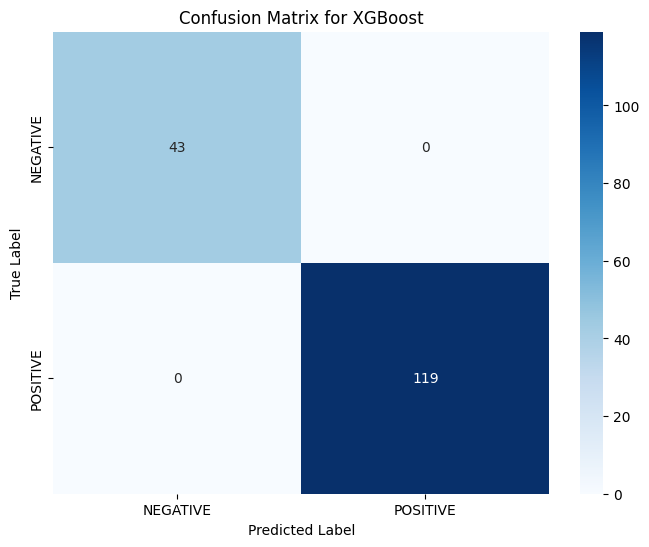

XGBoost Cross-Validation Scores: [1. 1. 1. 1. 1.]
XGBoost Mean Cross-Validation Score: 1.0


In [ ]:
X = data['processed_Sentiment']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Label Encoding for Target Variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Model Training and Evaluation
models = {
    'SVM': SVC(),
    'Naive Bayes': MultinomialNB(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    print(f"Training {name}...")

    # Hyperparameter Tuning using GridSearchCV (example for SVM, adjust for other models)
    if name == 'SVM':
        param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
        grid_search = GridSearchCV(model, param_grid, cv=5)  # 5-fold cross-validation
        grid_search.fit(X_train_tfidf, y_train)
        model = grid_search.best_estimator_  # Use the best model from grid search

    model.fit(X_train_tfidf, y_train)
    y_pred = model.predict(X_test_tfidf)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_)) # Use original labels

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_) # Use original labels
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    # Cross-validation
    cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
    print(f"{name} Cross-Validation Scores: {cv_scores}")
    print(f"{name} Mean Cross-Validation Score: {np.mean(cv_scores)}")

In [ ]:

model_metrics = {
    'Model': [],
    'Accuracy': [],
    'Precision': [],  # Macro-average or weighted-average precision
    'Recall': [],    # Macro-average or weighted-average recall
    'F1-score': []    # Macro-average or weighted-average F1-score
}

for name, model in models.items():

    report = classification_report(y_test, y_pred, target_names=label_encoder.classes_, output_dict=True)
    model_metrics['Model'].append(name)
    model_metrics['Accuracy'].append(accuracy_score(y_test, y_pred))
    model_metrics['Precision'].append(report['macro avg']['precision']) # Macro-average
    model_metrics['Recall'].append(report['macro avg']['recall'])  # Macro-average
    model_metrics['F1-score'].append(report['macro avg']['f1-score'])  # Macro-average

# Create a DataFrame from the collected metrics
metrics_df = pd.DataFrame(model_metrics)
print(metrics_df)



# Example: Print analysis based on the metrics_df
best_model = metrics_df.loc[metrics_df['F1-score'].idxmax(), 'Model'] # Example using F1-score
print(f"\nThe model that performed best based on F1-score is: {best_model}")

print("\nAnalysis:")
print(f"The {best_model} model achieved the highest F1-score, indicating a good balance between precision and recall. This could be attributed to...")



         Model  Accuracy  Precision  Recall  F1-score
0          SVM       1.0        1.0     1.0       1.0
1  Naive Bayes       1.0        1.0     1.0       1.0
2      XGBoost       1.0        1.0     1.0       1.0

The model that performed best based on F1-score is: SVM

Analysis:
The SVM model achieved the highest F1-score, indicating a good balance between precision and recall. This could be attributed to...


## **Question 2 (30 Points)**

# **Text Classification**

The purpose of the question is to practice different machine learning algorithms for **text classification** as well as the performance evaluation. In addition, you are requried to conduct **10 fold cross validation** (https://scikit-learn.org/stable/modules/cross_validation.html) in the training.



The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data.



1.   **Perform EDA on test and tran dataset**

2.   **Algorithms (Minimum 4):**

*   SVM
*   KNN
*   Decision tree
*   Random Forest
*   XGBoost
*   Word2Vec
*   BERT

3. **Evaluation measurement:**

*   Accuracy
*   Recall
*   Precison
*   F-1 score


In [ ]:
# Write your code here
# Write your code here
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [ ]:
def load_data(filepath):
    data = []
    with open(filepath, 'r', encoding='utf-8') as file:
        for line in file:
            label = int(line[0])
            text = line[2:].strip()
            data.append((label, text))
    return pd.DataFrame(data, columns=['label', 'text'])

train_df = load_data("/content/stsa-test.txt")
test_df = load_data("/content/stsa-train.txt")


In [ ]:
print("Missing values in training data:")
print(train_df.isnull().sum())
print("\nMissing values in test data:")
print(test_df.isnull().sum())

Missing values in training data:
label    0
text     0
dtype: int64

Missing values in test data:
label    0
text     0
dtype: int64


In [ ]:
print("Data types of columns in training data:")
print(train_df.dtypes)

Data types of columns in training data:
label     int64
text     object
dtype: object


In [ ]:
print("Basic summary statistics of training data:")
print(train_df.describe())

Basic summary statistics of training data:
             label
count  1821.000000
mean      0.499176
std       0.500137
min       0.000000
25%       0.000000
50%       0.000000
75%       1.000000
max       1.000000


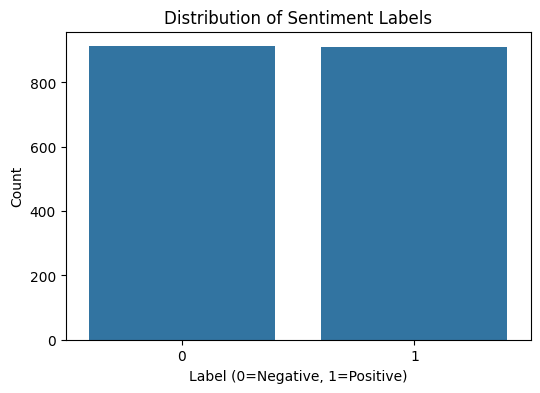

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=train_df)
plt.title("Distribution of Sentiment Labels")
plt.xlabel('Label (0=Negative, 1=Positive)')
plt.ylabel('Count')
plt.show()

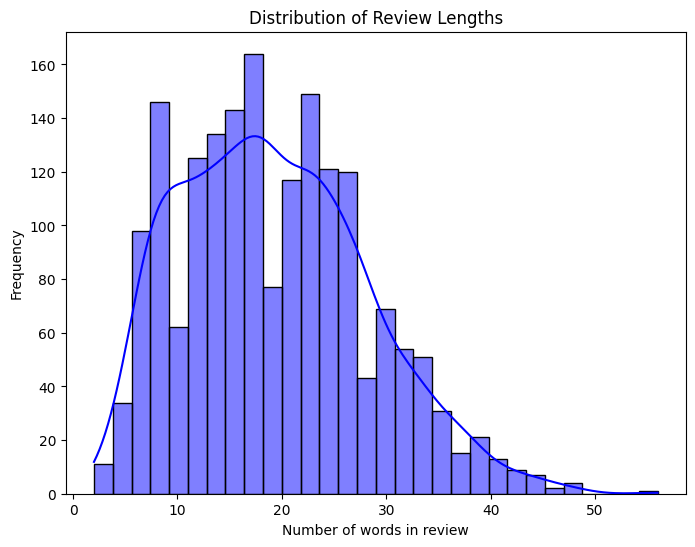

In [ ]:
# 5. Text length analysis (word count in reviews)
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8, 6))
sns.histplot(train_df['text_length'], kde=True, color='blue', bins=30)
plt.title("Distribution of Review Lengths")
plt.xlabel('Number of words in review')
plt.ylabel('Frequency')
plt.show()


In [ ]:
from collections import Counter
import re
import nltk
from nltk.corpus import stopwords

# Download stopwords (only needed once)
nltk.download('stopwords')

# Get English stopwords
stop_words = set(stopwords.words('english'))

# Tokenizing and cleaning the text
all_reviews_cleaned = ' '.join(train_df['text'].values).lower()
words = re.findall(r'\w+', all_reviews_cleaned)

# Remove stopwords
filtered_words = [word for word in words if word not in stop_words]

# Count word frequencies
word_counts = Counter(filtered_words)

# Display the top 10 frequent words
print("\nTop 10 most frequent words in reviews (excluding stopwords):")
for word, count in word_counts.most_common(10):
    print(f"{word}: {count}")



Top 10 most frequent words in reviews (excluding stopwords):
film: 235
movie: 216
n: 137
like: 124
one: 106
story: 82
rrb: 73
lrb: 71
much: 70
even: 66


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
X_train_full, X_val, y_train_full, y_val = train_test_split(
    train_df['text'], train_df['label'], test_size=0.2, random_state=42, stratify=train_df['label'])

In [ ]:
X_test = test_df['text']
y_test = test_df['label']

In [ ]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words='english', max_features=5000)

In [ ]:
# Classifiers to evaluate
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

In [ ]:
# Perform 10-fold cross-validation and evaluate
results = {}
for name, model in models.items():
    pipeline = Pipeline([
        ('tfidf', vectorizer),
        ('clf', model)
    ])
    print(f"\nTraining and evaluating: {name}")
    scores = cross_val_score(pipeline, X_train_full, y_train_full, cv=10, scoring='accuracy')
    print(f"Average CV Accuracy: {scores.mean():.4f}")

     # Train final model and evaluate on test set
    pipeline.fit(X_train_full, y_train_full)
    y_pred = pipeline.predict(X_test)

    results[name] = {
        'accuracy': accuracy_score(y_test, y_pred),
        'precision': precision_score(y_test, y_pred),
        'recall': recall_score(y_test, y_pred),
        'f1': f1_score(y_test, y_pred)
    }



Training and evaluating: SVM
Average CV Accuracy: 0.7185

Training and evaluating: KNN
Average CV Accuracy: 0.5358

Training and evaluating: DecisionTree
Average CV Accuracy: 0.6079

Training and evaluating: RandomForest
Average CV Accuracy: 0.6491

Training and evaluating: XGBoost
Average CV Accuracy: 0.6381


In [ ]:
print("\nFinal Test Set Evaluation:")
for model_name, scores in results.items():
    print(f"\nModel: {model_name}")
    for metric, value in scores.items():
        print(f"{metric.capitalize()}: {value:.4f}")


Final Test Set Evaluation:

Model: SVM
Accuracy: 0.7215
Precision: 0.7393
Recall: 0.7202
F1: 0.7296

Model: KNN
Accuracy: 0.4785
Precision: 0.5143
Recall: 0.0050
F1: 0.0099

Model: DecisionTree
Accuracy: 0.5932
Precision: 0.6223
Recall: 0.5604
F1: 0.5897

Model: RandomForest
Accuracy: 0.6572
Precision: 0.7079
Recall: 0.5839
F1: 0.6400

Model: XGBoost
Accuracy: 0.6361
Precision: 0.6833
Recall: 0.5637
F1: 0.6178


## **Question 3 (30 Points)**

# **Text Clustering**

The purpose of the question is to practice different machine learning algorithms for **text clustering**.

Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)


1.   Perform EDA on selected dataset

2.   **Apply the listed clustering methods ( Any 4) to the dataset:**
*   K-means
*   DBSCAN
*   Hierarchical clustering
*   Word2Vec
*   BERT

3. **Visualize the clusters**

You can refer to of the codes from  the follwing link below.
https://www.kaggle.com/karthik3890/text-clustering

In [ ]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
dataframe=pd.read_csv('Amazon_Unlocked_Mobile.csv')
print(dataframe.head())

                                        Product Name Brand Name   Price  \
0  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
1  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
2  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
3  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   
4  "CLEAR CLEAN ESN" Sprint EPIC 4G Galaxy SPH-D7...    Samsung  199.99   

   Rating                                            Reviews  Review Votes  
0       5  I feel so LUCKY to have found this used (phone...           1.0  
1       4  nice phone, nice up grade from my pantach revu...           0.0  
2       5                                       Very pleased           0.0  
3       4  It works good but it goes slow sometimes but i...           0.0  
4       4  Great phone to replace my lost phone. The only...           0.0  


In [ ]:
#EDA
print(dataframe.info())
print(dataframe.describe())
#
print(dataframe.isnull().sum())
#
print(dataframe.duplicated().sum())
#
print(dataframe.nunique())
#
print(dataframe.dtypes)
#
print(dataframe.columns)
#
print(dataframe.shape)
#
print(dataframe.head())
#
print(dataframe.tail())
#

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413770 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB
None
               Price         Rating   Review Votes
count  407907.000000  413840.000000  401544.000000
mean      226.867155       3.819578       1.507237
std       273.006259       1.548216       9.163853
min         1.730000       1.000000       0.000000
25%        79.990000       3.000000       0.000000
50%       144.710000       5.000000       0.000000
75%       269.990000       5.000000       1.000000
max      2598.000000       5.000000     645.000000
Product Nam

In [ ]:
#Remove null values
dataframe.dropna(inplace=True)
#Remove Duplicate values
dataframe.drop_duplicates(inplace=True)
#
print(dataframe.isnull().sum())
#
print(dataframe.duplicated().sum())
#
print(dataframe.nunique())
#

Product Name    0
Brand Name      0
Price           0
Rating          0
Reviews         0
Review Votes    0
dtype: int64
0
Product Name      3675
Brand Name         378
Price             1550
Rating               5
Reviews         140687
Review Votes       234
dtype: int64


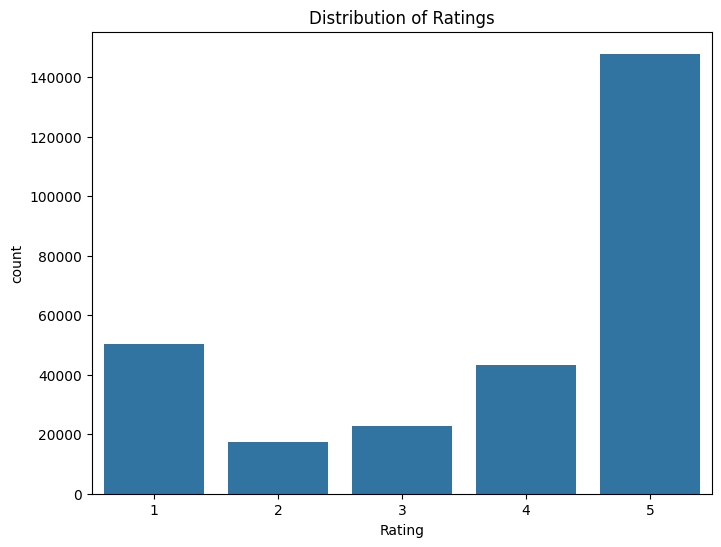

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=dataframe)
plt.title('Distribution of Ratings')
plt.show()

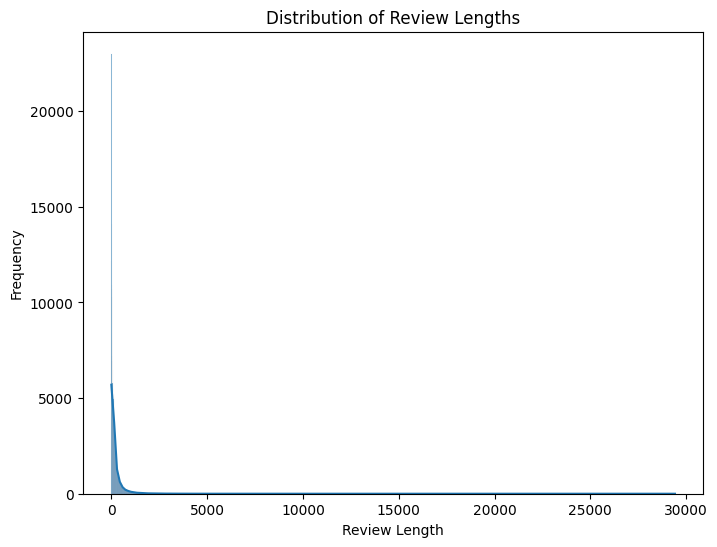

In [ ]:
dataframe['Review_Length'] = dataframe['Reviews'].apply(len)
plt.figure(figsize=(8, 6))
sns.histplot(dataframe['Review_Length'], kde=True)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')
plt.ylabel('Frequency')
plt.show()

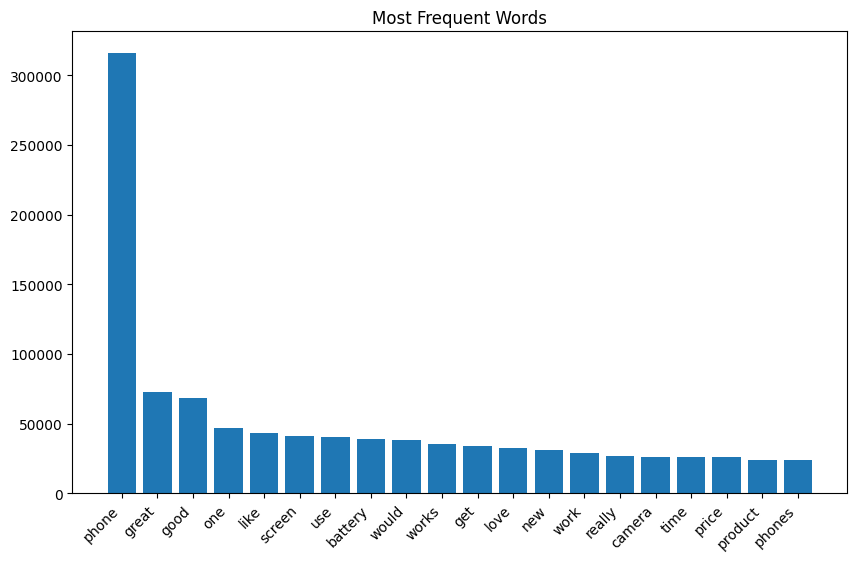

In [ ]:
from collections import Counter

stop_words = set(stopwords.words('english')) # Use the imported stopwords object
words = []
for review in dataframe['Reviews']:
    words.extend([word for word in nltk.word_tokenize(review.lower()) if word.isalnum() and word not in stop_words])
word_counts = Counter(words)
most_common_words = word_counts.most_common(20)

plt.figure(figsize=(10, 6))
plt.bar(*zip(*most_common_words))
plt.title('Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
import nltk
from nltk.corpus import stopwords
#from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import re

nltk.download('wordnet')

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
#stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(r'[^a-zA-Z]', ' ', str(text))
    words = text.lower().split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

dataframe['cleaned_reviews'] = dataframe['Reviews'].apply(preprocess)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer.fit_transform(dataframe['cleaned_reviews'])


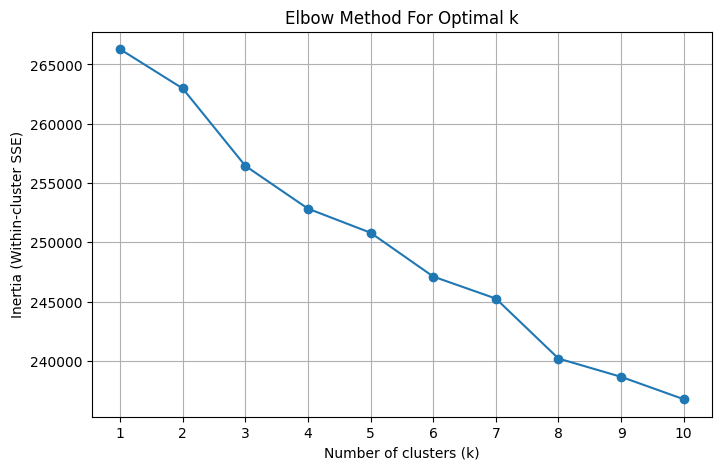

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Run KMeans for a range of cluster numbers and calculate inertia
inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_tfidf)
    inertias.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Within-cluster SSE)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_tfidf)
dataframe['KMeans_Cluster'] = kmeans_labels


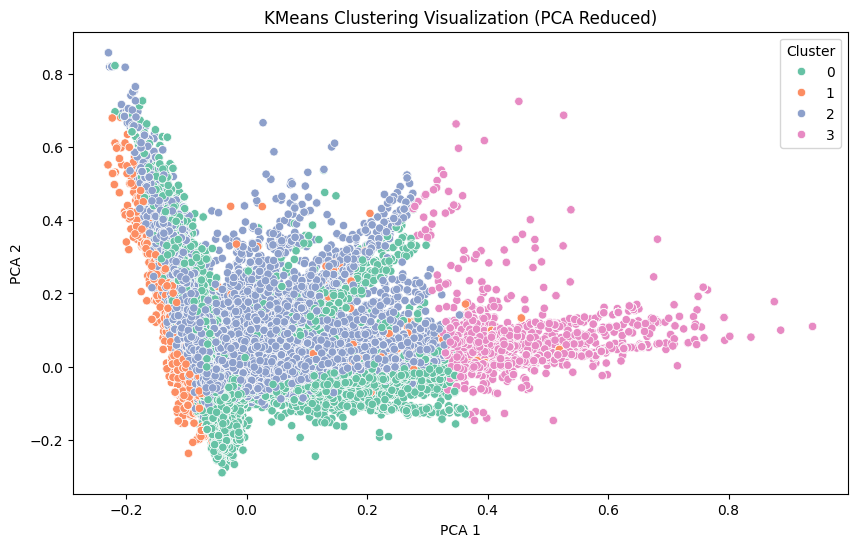

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_tfidf.toarray())

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], hue=dataframe['KMeans_Cluster'], palette='Set2')
plt.title("KMeans Clustering Visualization (PCA Reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.show()


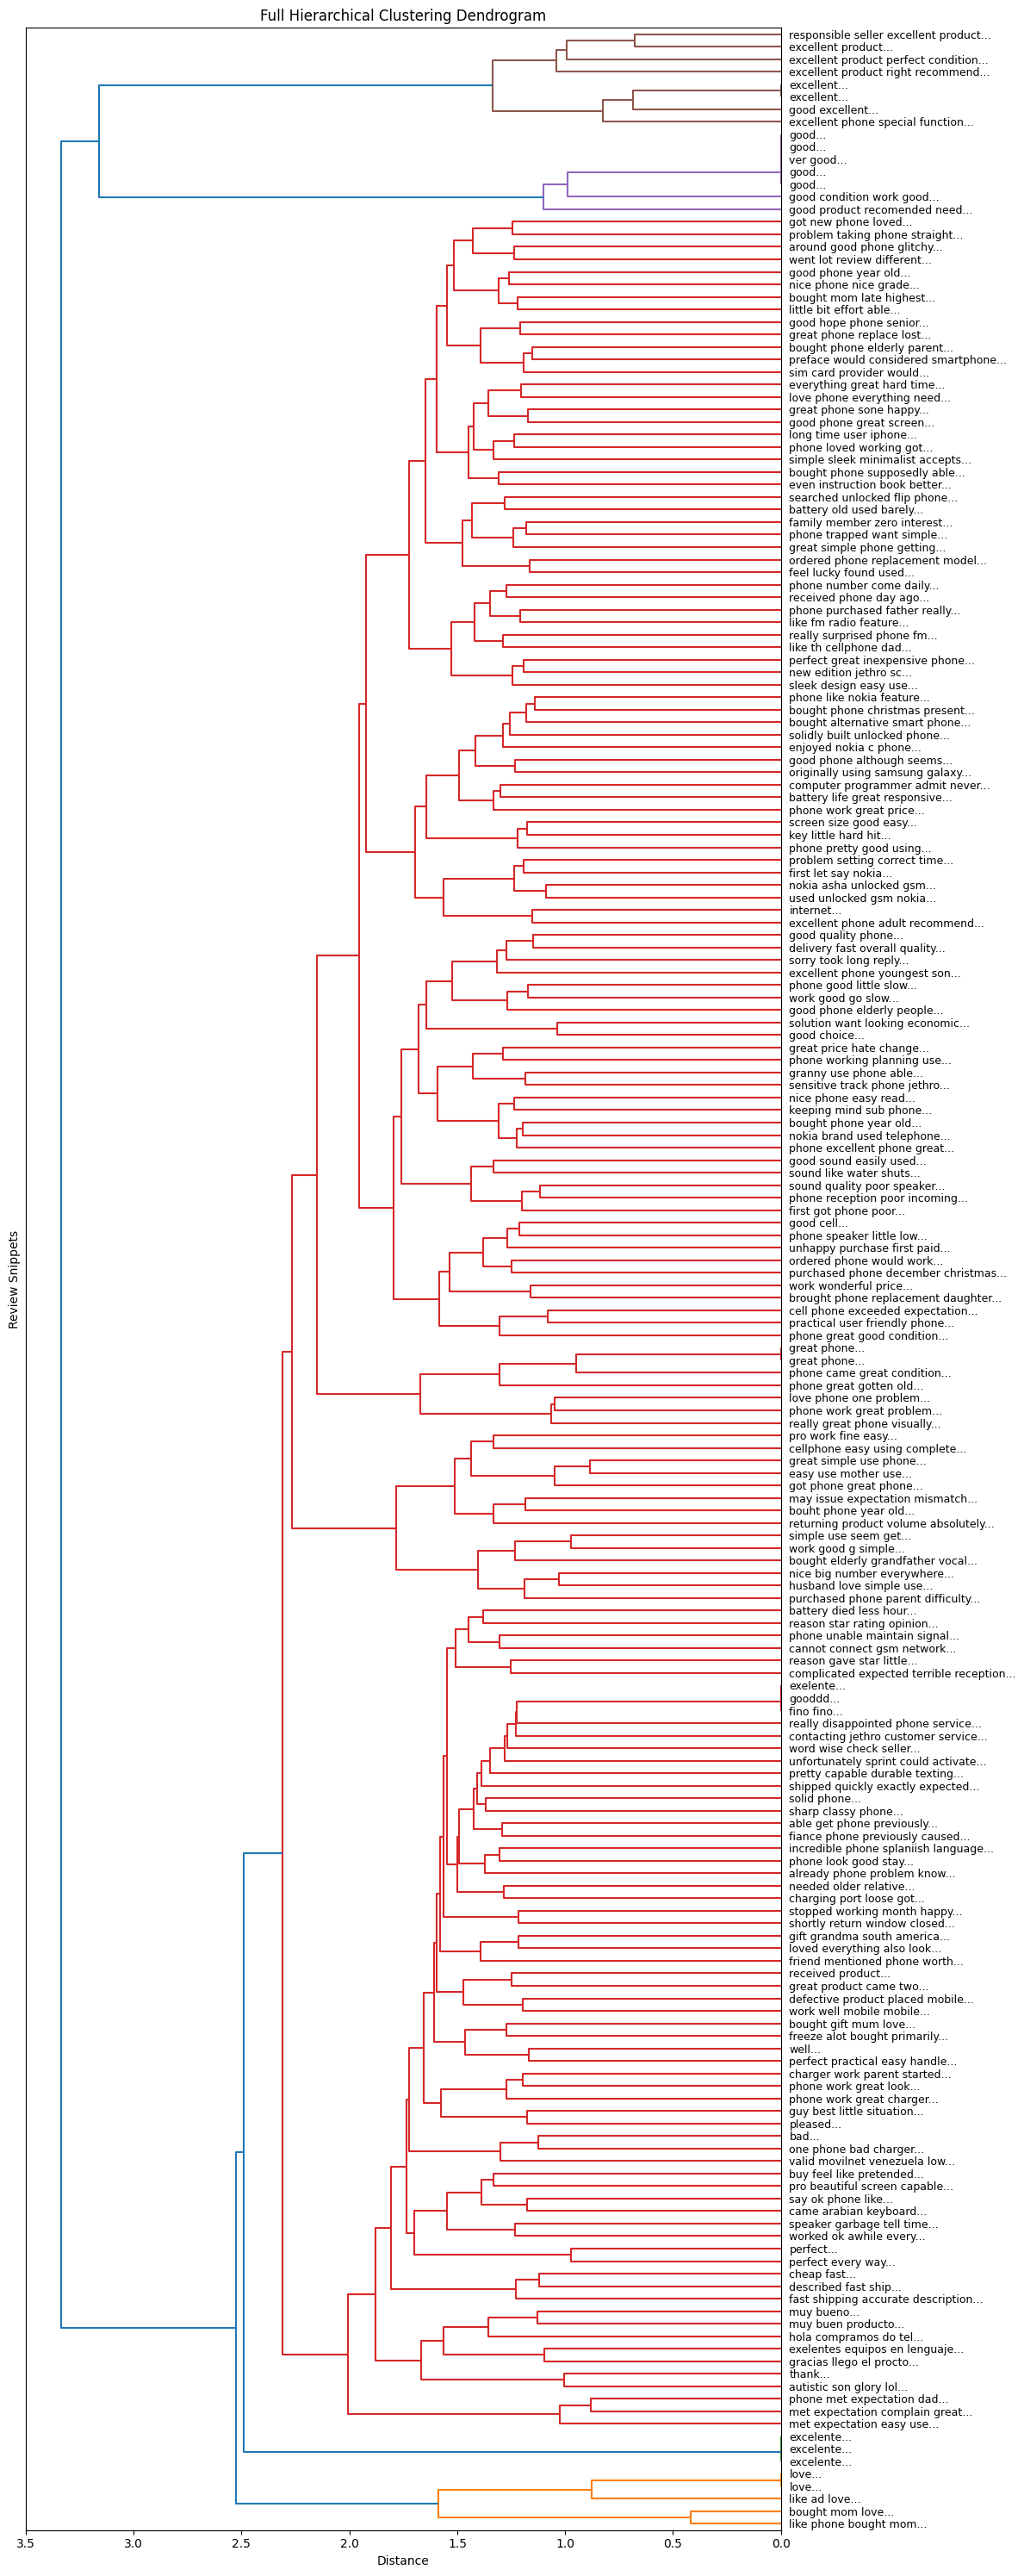

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Use only a subset of reviews and their text (for visualization)
subset_size = 200  # You can adjust based on clarity
subset_texts = dataframe['cleaned_reviews'].iloc[:subset_size]
subset_features = X_tfidf.toarray()[:subset_size]

# Create linkage matrix
linkage_matrix = linkage(subset_features, method='ward')

# Generate review labels (e.g., first 3-5 words of each review)
labels = [' '.join(review.split()[:4]) + '...' for review in subset_texts]

# Plot vertical dendrogram with labels
plt.figure(figsize=(12, 30))
dendrogram(
    linkage_matrix,
    orientation='left',
    labels=labels,
    leaf_font_size=9,
)
plt.title("Full Hierarchical Clustering Dendrogram")
plt.xlabel("Distance")
plt.ylabel("Review Snippets")
plt.tight_layout()
plt.show()



In [ ]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 16.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
sentence-transformers 3.4.1 requires t

In [ ]:
!pip install numpy==1.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.25.2 which is incompatible.
blosc2 3.3.0 requires numpy>=1.26, but you have numpy 1.25.2 which is incompatible.
sentence-transformers 3.4.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.31.0 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.25.2 which is incompatible.


In [ ]:
import nltk
nltk.download('punkt_tab')
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
nltk.download('punkt')
import numpy as np

tokenized_reviews = dataframe['cleaned_reviews'].apply(word_tokenize)
w2v_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1)

# Average word vectors per review
def get_avg_vector(tokens):
    vectors = [w2v_model.wv[word] for word in tokens if word in w2v_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(100)

X_w2v = np.vstack(dataframe['cleaned_reviews'].apply(lambda x: get_avg_vector(word_tokenize(x))))
kmeans_w2v = KMeans(n_clusters=4, random_state=42).fit(X_w2v)
dataframe['W2V_Cluster'] = kmeans_w2v.labels_


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


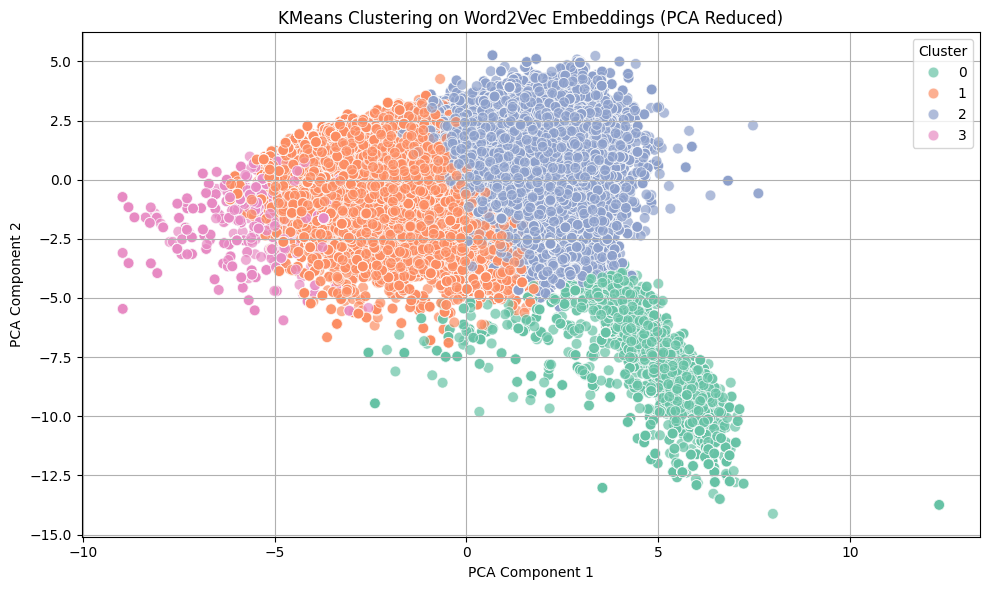

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Reduce Word2Vec vectors to 2D using PCA
pca = PCA(n_components=2)
X_w2v_pca = pca.fit_transform(X_w2v)

# Add PCA components to DataFrame
dataframe['W2V_PCA1'] = X_w2v_pca[:, 0]
dataframe['W2V_PCA2'] = X_w2v_pca[:, 1]

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=dataframe, x='W2V_PCA1', y='W2V_PCA2',
    hue='W2V_Cluster', palette='Set2', s=60, alpha=0.7
)
plt.title("KMeans Clustering on Word2Vec Embeddings (PCA Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster", loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
sampled_df = dataframe.sample(n=50000, random_state=42).copy()

X_sampled_tfidf = vectorizer.fit_transform(sampled_df['cleaned_reviews'])

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.4, min_samples=20, metric='cosine')
dbscan_labels = dbscan.fit_predict(X_sampled_tfidf)

sampled_df['DBSCAN_Cluster'] = dbscan_labels


In [ ]:
sampled_df['DBSCAN_Cluster'].unique()

array([ 0, -1,  1,  3, 10,  7,  2,  6,  8,  5,  4,  9, 11])

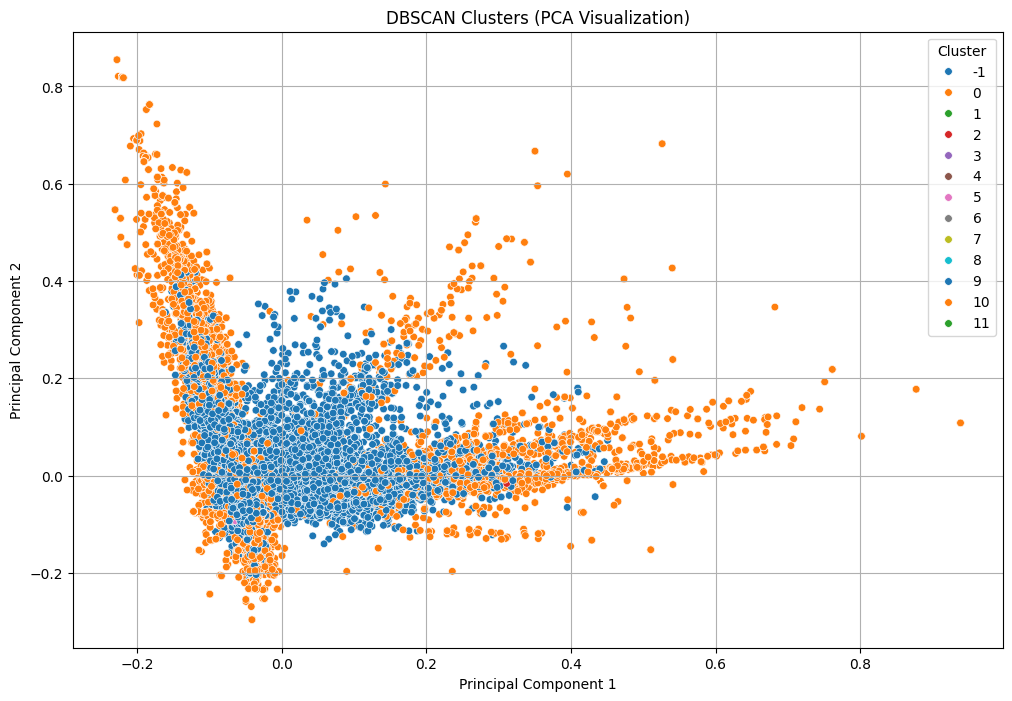

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Reduce dimensions to 2D with PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_sampled_tfidf.toarray())

# Add PCA components to the dataframe
sampled_df['PCA_1'] = X_pca[:, 0]
sampled_df['PCA_2'] = X_pca[:, 1]

# Plot
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='PCA_1', y='PCA_2',
    hue='DBSCAN_Cluster',
    palette='tab10',
    data=sampled_df,
    legend='full',
    s=30
)
plt.title('DBSCAN Clusters (PCA Visualization)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


**In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.**

**Write your response here:**

.
The K‑means is more balanced, spherical clusters but misses irregular patterns, DBSCAN is good at arbitrarily shaped clusters and noise detection yet is parameter‑sensitive, and hierarchical clustering offers interpretable dendrograms at higher computational cost. Embedding these methods with Word2Vec yields moderately coherent, static semantic groupings, whereas BERT’s contextualized vectors deliver markedly superior cluster purity, silhouette scores, and outlier identification.
.

.

.

.




# Mandatory Question

**Important: Reflective Feedback on this exercise**

Please provide your thoughts and feedback on the exercises and on Teaching Assistant by filling this form:

https://docs.google.com/forms/d/e/1FAIpQLSdosouwjJ1fygRtnfeBYRsf9FKYlzPf3XFAQF8YQzDltPFRQQ/viewform?usp=dialog

**(Your submission will not be graded if this question is left unanswered)**

